In [15]:
!pip install tensorflow
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [17]:
x_train.shape

(60000, 28, 28)

In [18]:
y_train.shape

(60000,)

In [19]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [20]:
y_train[0]

9

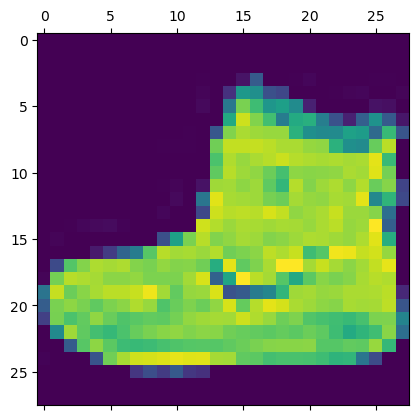

In [21]:
plt.matshow(x_train[0])

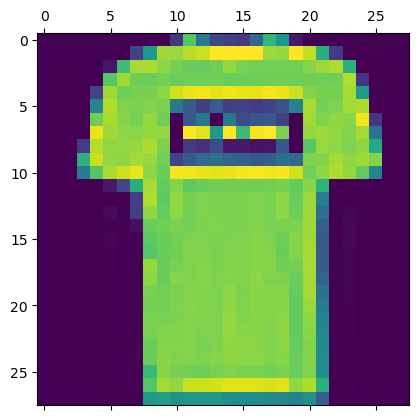

In [22]:
plt.matshow(x_train[1])

In [23]:
x_train = x_train / 255
x_test = x_test / 255

In [24]:
y_train[0:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [25]:
y_train_categorical = keras.utils.to_categorical(y_train, num_classes = 10, dtype = 'float32')
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [26]:
y_test_categorical = keras.utils.to_categorical(y_test, num_classes=10, dtype='float32')

In [27]:
28 * 28

784

In [32]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(500, activation = 'relu'),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train, y_train_categorical, epochs = 1)

1875/1875 [==============================] - 9s 4ms/step - loss: 0.4846 - accuracy: 0.8248


In [33]:
model.evaluate(x_test, y_test_categorical)

313/313 [==============================] - 1s 3ms/step - loss: 0.4427 - accuracy: 0.8379


[0.44274935126304626, 0.8378999829292297]

In [34]:
y_predicted = model.predict(x_test)
y_predicted = [np.argmax(i) for i in y_predicted]
y_predicted[:5]

313/313 [==============================] - 1s 2ms/step


[9, 2, 1, 1, 6]

In [35]:
y_test[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

In [36]:
cm = tf.math.confusion_matrix(labels = y_test, predictions= y_predicted)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[899,   1,  10,  16,  11,   0,  43,   0,  20,   0],
       [  9, 962,   1,  17,   8,   0,   1,   0,   2,   0],
       [ 22,   0, 717,   6, 235,   0,  16,   0,   4,   0],
       [ 68,  16,  12, 735, 142,   0,  19,   0,   8,   0],
       [  0,   1,  60,   2, 918,   0,  13,   0,   6,   0],
       [  0,   0,   1,   0,   0, 892,   0,  62,  17,  28],
       [228,   1, 111,  19, 241,   0, 374,   0,  26,   0],
       [  0,   0,   0,   0,   0,  10,   0, 943,   2,  45],
       [  2,   1,   3,   2,   6,   1,   1,   4, 980,   0],
       [  0,   0,   0,   0,   0,   5,   0,  34,   2, 959]], dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

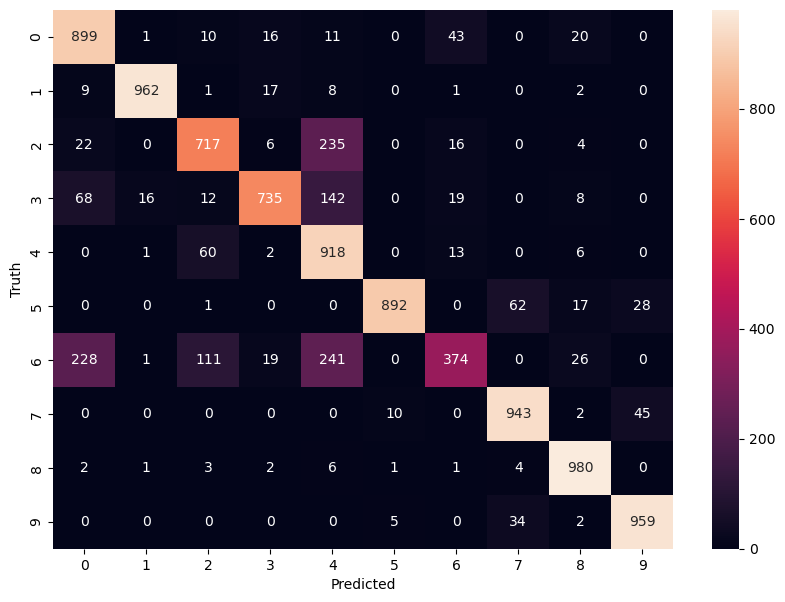

In [37]:
import seaborn as sn
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')